## Python e Finanças

é uma das grandes aplicações do Python. Não é uma integração, mas sim aplicações de bibliotecas já existentes, aplicadas a ativos financeiros. As três principais bibliotecas usadas para esse propósito são:

1. pandas
2. matplotlib
3. numpy

Essencialmente, trata-se de aplicar tudo o que foi aprendido nestas três bibliotecas. Além disso, para puxar cotações diretamente do Yahoo Finance, deve-se também instalar o pandas_datareader, usando o pip para instalação.

###### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt

###### IBOV

In [2]:
yf.pdr_override()
start_data = dt.datetime(2020, 1, 1)
end_data = dt.datetime(2020, 11, 10)
indices = '^BVSP'
cotacao_ibov = pdr.get_data_yahoo(indices, start=start_data, end=end_data)
print(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-01-02  115652.0  118573.0  115649.0  118573.0   118573.0   5162700
2020-01-03  118564.0  118792.0  117341.0  117707.0   117707.0   6834500
2020-01-06  117707.0  117707.0  116269.0  116878.0   116878.0   6570000
2020-01-07  116872.0  117076.0  115965.0  116662.0   116662.0   4854100
2020-01-08  116667.0  117335.0  115693.0  116247.0   116247.0   5910500
...              ...       ...       ...       ...        ...       ...
2020-11-03   93968.0   96250.0   93968.0   95587.0    95587.0  10191800
2020-11-04   95992.0   98296.0   95987.0   97811.0    97811.0  10704600
2020-11-05   97873.0  100922.0   97872.0  100774.0   100774.0  10455300
2020-11-06  100751.0  100928.0   99837.0  100799.0   100799.0   8382800
2020-11-09  100954.0  105147.0  100954.0  103913.0   103913.0  1741

###### Analisando o Gráfico

<AxesSubplot:xlabel='Date'>

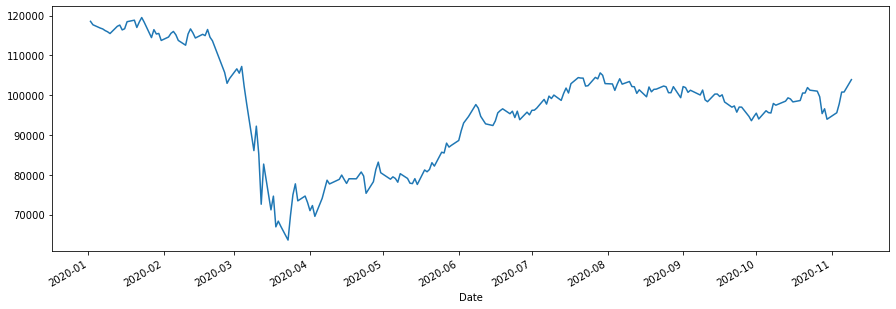

In [3]:
cotacao_ibov['Adj Close'].plot(figsize=(15,5))

###### Retorno do IBOV

In [4]:
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno IBOV: -12.36%


###### Analisando com Média Móvel

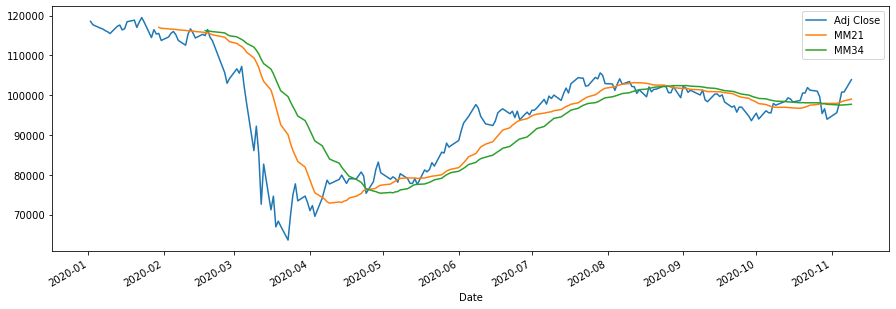

In [5]:
cotacao_ibov['Adj Close'].plot(figsize=(15,5))
cotacao_ibov['Adj Close'].rolling(21).mean().plot(label='MM21')  
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label='MM34')  
plt.legend()
plt.show()